In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [96]:
import random as r

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
!pip install ucimlrepo

In [134]:
from ucimlrepo import fetch_ucirepo
car_evaluation = fetch_ucirepo(id=19)
X = car_evaluation.data.features
y = car_evaluation.data.targets


In [135]:
df = pd.DataFrame(X)
df['target'] = y
df.dropna(inplace=True)

In [51]:
from sklearn.preprocessing import LabelEncoder

In [136]:
df = df.apply(LabelEncoder().fit_transform)

In [137]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [138]:
samples = []
for i in range(10):
    sam = df.sample(n=1000)
    Xs = sam.drop('target', axis=1)
    ys = sam['target']
    X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [145]:
best_params = None
best_accuracy = 0
hist =[]

In [147]:
for i, (X_train, X_test, y_train, y_test) in enumerate(samples):
    svm = SVC()
    convergence_history = []
    k_list = ['rbf','poly','sigmoid']

    best_score = 0
    best_params_sample = None
    for _ in range(200):
        c = r.randint(1,1000)/1000
        g = r.randint(1,1000)/1000
        k = k_list[r.randint(0,2)]
        params = {'C':c, 'gamma':g, 'kernel':k}
        svm.set_params(**params)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_params_sample = params

        convergence_history.append(best_score)

    if best_score > best_accuracy:
        best_accuracy = best_score
        best_params = best_params_sample
        hist = convergence_history

    print(f"Sample {i+1} - Best Parameters: {best_params_sample}, Accuracy: {best_score}")


Sample 1 - Best Parameters: {'C': 0.919, 'gamma': 0.638, 'kernel': 'rbf'}, Accuracy: 0.89
Sample 2 - Best Parameters: {'C': 0.316, 'gamma': 0.696, 'kernel': 'poly'}, Accuracy: 0.8833333333333333
Sample 3 - Best Parameters: {'C': 0.96, 'gamma': 0.87, 'kernel': 'rbf'}, Accuracy: 0.88
Sample 4 - Best Parameters: {'C': 0.772, 'gamma': 0.43, 'kernel': 'poly'}, Accuracy: 0.9166666666666666
Sample 5 - Best Parameters: {'C': 0.973, 'gamma': 0.537, 'kernel': 'rbf'}, Accuracy: 0.9066666666666666
Sample 6 - Best Parameters: {'C': 0.972, 'gamma': 0.667, 'kernel': 'rbf'}, Accuracy: 0.8933333333333333
Sample 7 - Best Parameters: {'C': 0.967, 'gamma': 0.587, 'kernel': 'rbf'}, Accuracy: 0.9066666666666666
Sample 8 - Best Parameters: {'C': 0.983, 'gamma': 0.472, 'kernel': 'rbf'}, Accuracy: 0.8966666666666666
Sample 9 - Best Parameters: {'C': 0.99, 'gamma': 0.598, 'kernel': 'rbf'}, Accuracy: 0.9233333333333333
Sample 10 - Best Parameters: {'C': 0.627, 'gamma': 0.505, 'kernel': 'poly'}, Accuracy: 0.89333

In [148]:
print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy}")

Best Parameters: {'C': 0.99, 'gamma': 0.598, 'kernel': 'rbf'}, Best Accuracy: 0.9233333333333333


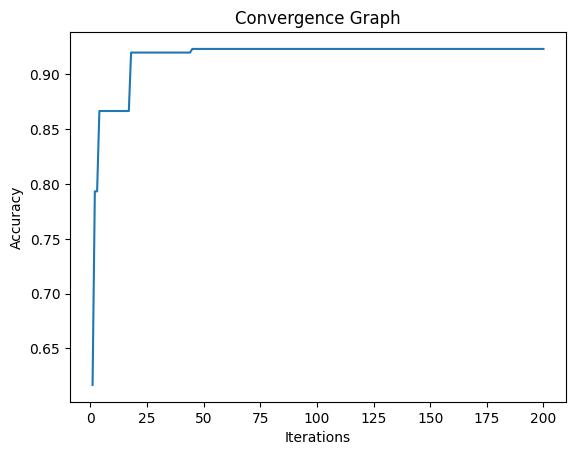

In [149]:
plt.plot(range(1, len(hist) + 1), hist)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
# plt.ylim(0.99, 1.0)
plt.title('Convergence Graph')
plt.show()